<a href="https://colab.research.google.com/github/cbmoliveira/Histogram/blob/main/Picos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from pandas import read_csv
import pandas as pd
import scipy.signal as sp
from scipy.signal import savgol_filter
import plotly.express as px
import plotly.graph_objects as go
from scipy.signal import find_peaks


In [5]:
dados = read_csv('https://github.com/cbmoliveira/Histogram/blob/main/pico.txt', skiprows=2,sep = '\t', index_col=0) #mudarentrada
dados.head() #mostra o arquivo
dados = dados.values[:,0]


ParserError: Error tokenizing data. C error: Expected 1 fields in line 2445, saw 1011


In [4]:
fig = px.line(dados)
fig.show()

In [5]:
##dados.shape

histf = sp.savgol_filter(dados, 100, 3)


In [6]:
fig = px.line(histf)
fig.show()

In [1]:
indices = find_peaks(histf, threshold=20)[0]

fig = go.Figure()
fig.add_trace(go.Scatter(x=histf))

fig.add_trace(go.Scatter(
    x=indices,
    y=[dados[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

NameError: name 'find_peaks' is not defined

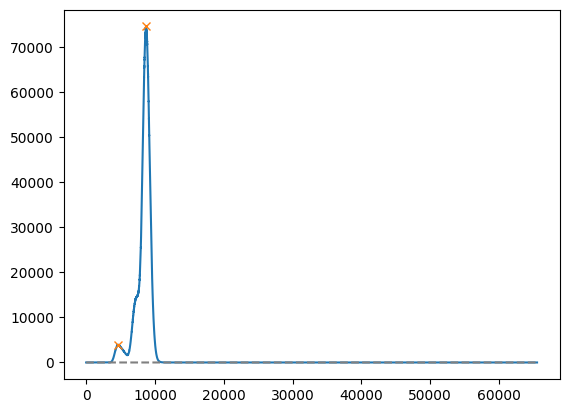

In [15]:
peaks,_= find_peaks(histf, prominence=250)
plt.plot(histf)
plt.plot(peaks, histf[peaks], "x")
plt.plot(np.zeros_like(histf), "--", color="gray")
plt.show()